In [17]:
import os
import json
import numpy as np
import matplotlib.pyplot as plt

In [29]:
class Experimental_Data:

    def __init__(self, json_path):

        f = open(json_path, "r")
        loaded_json = json.loads(f.read())
        f.close()
        
        self.id = loaded_json["id"]
        self.solver_class = loaded_json["solver_class"]
        self.initiated = bool(loaded_json["initiated"])
        self.converged = bool(loaded_json["converged"])
        self.terminated = bool(loaded_json["terminated"])
        self.iteration = int(loaded_json["iteration"])
        self.elapsed_time_ms = loaded_json["elapsed_time_ms"]
        self.res_norm_hist = np.array(loaded_json["res_norm_hist"])
        self.res_hist = np.array(loaded_json["res_hist"])
    
    def get_relres_hist(self):
        return self.res_norm_hist/self.res_norm_hist[0]

In [30]:
output_dir = "C:\\Users\\dosre\\dev\\numerical_experimentation\\output"
file_name = "MPGMRES.json"
data = Experimental_Data(os.path.join(output_dir, file_name))

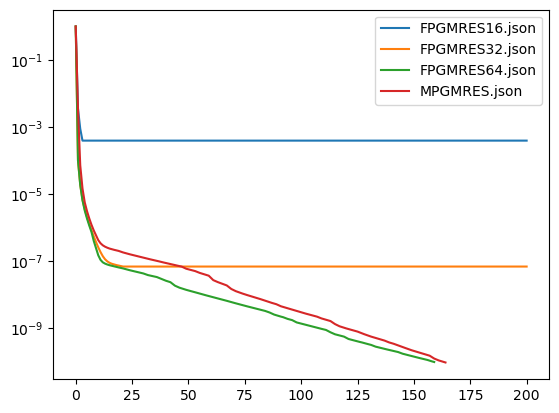

In [40]:
fig, ax = plt.subplots()
for file in os.listdir(output_dir):
    path = os.path.join(output_dir, file)
    data = Experimental_Data(path)
    ax.plot(np.arange(0, data.iteration+1, 1), data.get_relres_hist(), label=file)
ax.semilogy()
ax.legend()
plt.show()

163